**Importazione delle librerie necessarie**



In [11]:
# importazione delle librerie necessarie
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [12]:
def show_images_in_column(images, n=10):
    plt.figure(figsize=(4, n * 4))  # Larghezza fissa, altezza proporzionale al numero immagini
    for i in range(n):
        plt.subplot(n, 1, i + 1)  # n righe, 1 colonna, posizione i+1
        plt.imshow(images[i].astype('uint8'))
        plt.title(f"Image {i}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [13]:
def show_images_in_column_gray(images, n=10):
    plt.figure(figsize=(4, n * 4))  # Larghezza fissa, altezza proporzionale al numero immagini
    for i in range(n):
        plt.subplot(n, 1, i + 1)  # n righe, 1 colonna, posizione i+1
        plt.imshow(images[i].astype('uint8'), cmap='gray')
        plt.title(f"Image {i}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [14]:
def convert_to_grayscale(images):
    """
    Converte un batch di immagini RGB in scala di grigi.

    Parametri:
    - images: array NumPy con shape (N, H, W, 3), valori in [0, 255]

    Ritorna:
    - images_gray: array NumPy con shape (N, H, W), valori in float32
    """
    if images.dtype != np.float32:
        images = images.astype(np.float32)

    # Applica la formula del grigio (pesi percettivi)
    images_gray = 0.299 * images[:, :, :, 0] + \
                  0.587 * images[:, :, :, 1] + \
                  0.114 * images[:, :, :, 2]

    return images_gray  # shape: (N, H, W)

In [15]:
def adjust_contrast(images, factor=0.5):  # < 1.0 riduce il contrasto
        modified = []
        for img in images:
            pil_img = Image.fromarray(img.astype(np.uint8))
            enhancer = ImageEnhance.Contrast(pil_img)
            img_enhanced = enhancer.enhance(factor)
            modified.append(np.array(img_enhanced))

        return np.array(modified)

In [16]:
def load_preprocess_data():
    np.random.seed(0)

    # caricamento del dataset
    x_train = np.load('/content/drive/MyDrive/x_train.npy')
    x_test= np.load('/content/drive/MyDrive/x_test.npy')
    x_val= np.load('/content/drive/MyDrive/x_val.npy')
    y_train = np.load('/content/drive/MyDrive/y_train.npy')
    y_test = np.load('/content/drive/MyDrive/y_test.npy')
    y_val = np.load('/content/drive/MyDrive/y_val.npy')

    print("x_train shape:", x_train.shape)
    print("x_val shape:", x_val.shape)
    print("x_test shape:", x_test.shape)

    # Riordina casualmente i dati
    train_indices = np.random.permutation(len(x_train))
    val_indices = np.random.permutation(len(x_val))
    test_indices = np.random.permutation(len(x_test))

    x_train = x_train[train_indices]
    y_train = y_train[train_indices]
    x_val = x_val[val_indices]
    y_val = y_val[val_indices]
    x_test = x_test[test_indices]
    y_test = y_test[test_indices]

    '''# Riduci il numero di campioni
    x_train = x_train[:10000]
    y_train = y_train[:10000]
    x_val = x_val[:1000]
    y_val = y_val[:1000]
    x_test = x_test[:1000]
    y_test = y_test[:1000]'''

    # plot delle immagini (n=25)
    print("\nVisualizzazione di alcune immagini di train, validation e test set")
    show_images_in_column(x_train, n=25)
    show_images_in_column(x_val, n=25)
    show_images_in_column(x_test, n=25)

    '''# riduzione del contrasto (soluzione adottata per cercare di ridurre l'overfit del modello)
    x_train = adjust_contrast(x_train, factor=1.0)'''

    # CONVERSIONE IN SCALA DI GRIGI (soluzione adottata per cercare di ridurre l'overfit del modello)
    x_train = convert_to_grayscale(x_train)
    x_test = convert_to_grayscale(x_test)
    x_val = convert_to_grayscale(x_val)
    print("x_train shape (dopo scala di grigi):", x_train.shape)
    print("x_test shape (dopo scala di grigi):", x_test.shape)
    print("x_val shape (dopo scala di grigi):", x_val.shape)

    # visualizza le immagini in scala di grigi
    print("\nVisualizzazione del  train set in scala di grigi")
    show_images_in_column_gray(x_train, n=25)

    # appiattimento e normalizzazione
    x_train = x_train.reshape(-1, 32*32)
    x_val = x_val.reshape(-1, 32*32)
    x_test = x_test.reshape(-1, 32*32)

    print(f"Shape x_train: {x_train.shape}")
    print(f"Shape y_train: {y_train.shape}")
    print(f"Shape x_val: {x_val.shape}")
    print(f"Shape y_val: {y_val.shape}")
    print(f"Shape x_test: {x_test.shape}")
    print(f"Shape y_test: {y_test.shape}")

    return x_train, y_train, x_val, y_val, x_test, y_test


x_train shape: (40000, 32, 32, 3)
x_val shape: (10000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)

Visualizzazione di alcune immagini di train, validation e test set


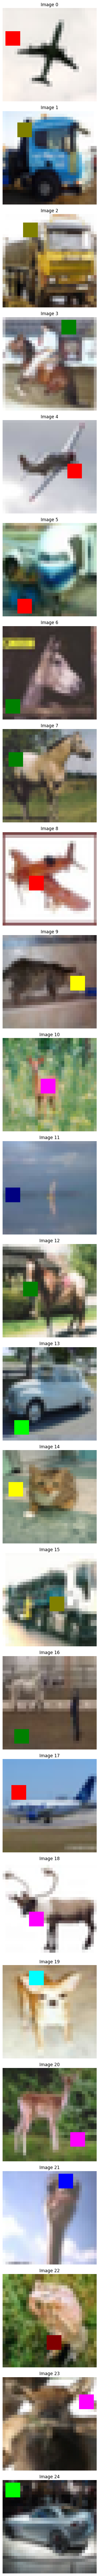

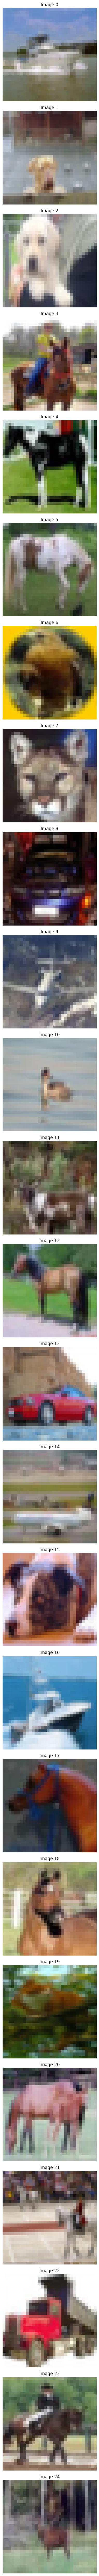

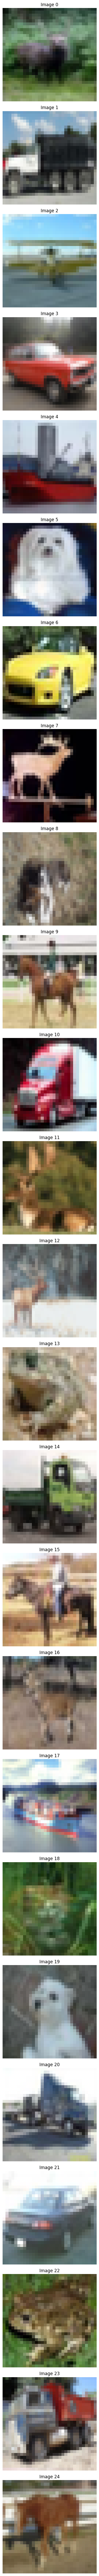

x_train shape (dopo scala di grigi): (40000, 32, 32)
x_test shape (dopo scala di grigi): (10000, 32, 32)
x_val shape (dopo scala di grigi): (10000, 32, 32)

Visualizzazione del  train set in scala di grigi


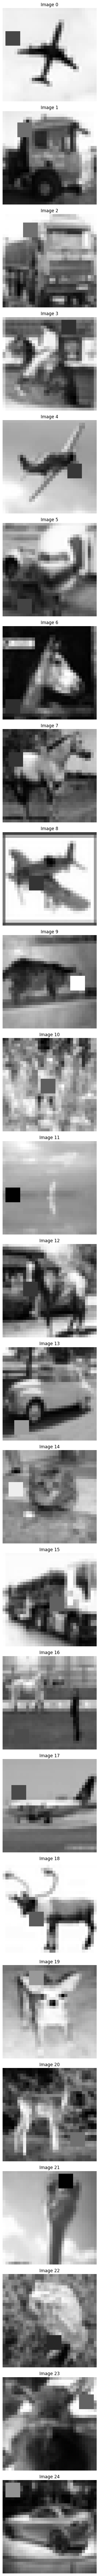

Shape x_train: (40000, 1024)
Shape y_train: (40000, 1)
Shape x_val: (10000, 1024)
Shape y_val: (10000, 1)
Shape x_test: (10000, 1024)
Shape y_test: (10000, 1)


In [17]:
x_train, y_train, x_val, y_val, x_test, y_test = load_preprocess_data()

In [18]:
def apply_pca_and_scale(x_train, x_val, x_test, n_components):
    """Applica StandardScaler e PCA."""

    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_val_scaled = scaler.transform(x_val)
    x_test_scaled = scaler.transform(x_test)

    pca = PCA(n_components=n_components)
    x_train_pca = pca.fit_transform(x_train_scaled)
    x_val_pca = pca.transform(x_val_scaled)
    x_test_pca = pca.transform(x_test_scaled)

    print(f"PCA applicata. Numero di componenti selezionate: {pca.n_components_}")
    print(f"Varianza totale spiegata: {np.sum(pca.explained_variance_ratio_):.4f}")

    print(f"Shape x_train_pca: {x_train_pca.shape}")
    print(f"Shape x_val_pca: {x_val_pca.shape}")
    print(f"Shape x_test_pca: {x_test_pca.shape}")

    return x_train_pca, x_val_pca, x_test_pca

In [19]:
x_train_pca, x_val_pca, x_test_pca = apply_pca_and_scale(x_train, x_val, x_test, 0.95)

PCA applicata. Numero di componenti selezionate: 182
Varianza totale spiegata: 0.9501
Shape x_train_pca: (40000, 182)
Shape x_val_pca: (10000, 182)
Shape x_test_pca: (10000, 182)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best score (CV): 0.4126749861411902
Best params: {'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': (128, 64)}

Accuracy su training set: 0.593375

Classification Report:               precision    recall  f1-score   support

           0       0.63      0.56      0.60      4000
           1       0.74      0.69      0.72      4000
           2       0.46      0.47      0.46      4000
           3       0.49      0.46      0.48      4000
           4       0.54      0.52      0.53      4000
           5       0.57      0.44      0.50      4000
           6       0.60      0.64      0.62      4000
           7       0.63      0.75      0.68      4000
           8       0.61      0.70      0.65      4000
           9       0.65      0.69      0.67      4000

    accuracy                           0.59     40000
   macro avg       0.59      0.59      0.59     40000
weighted avg       0.59      0.59      0.59     40000




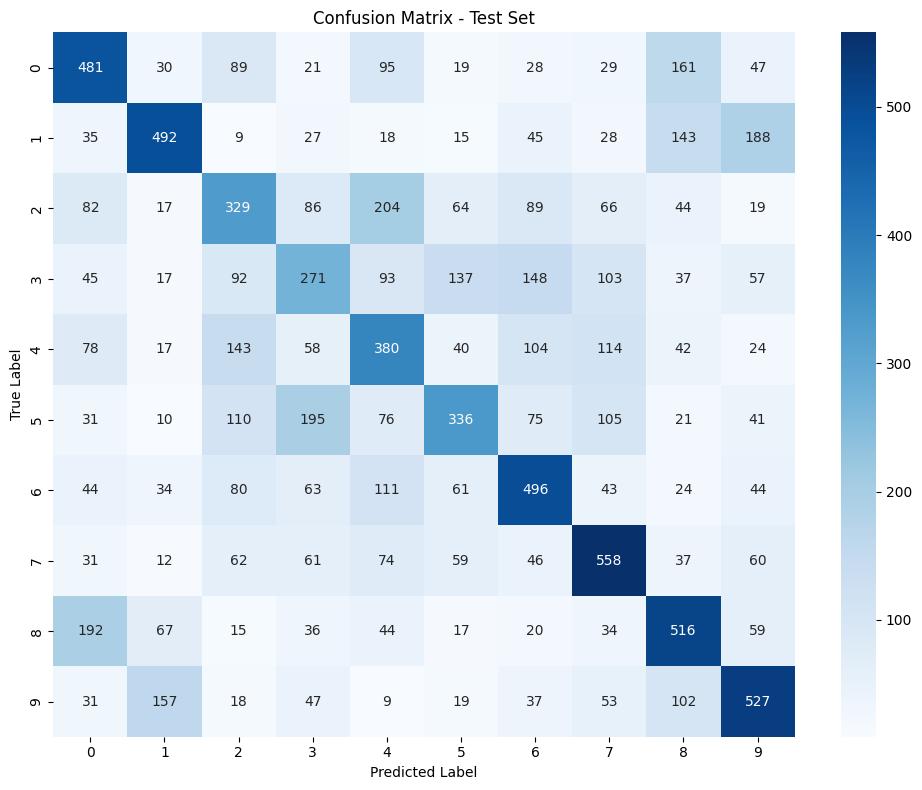

In [20]:
# definizione modello base
mlp = MLPClassifier(
    solver='adam',
    max_iter=100,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=42
)

# griglia degli iperparametri da provare
param_grid = {
    'hidden_layer_sizes': [(128,), (128, 64), (64, 32)],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],  # L2 regolarization
    'activation': ['relu', 'tanh'],
}

y_train = y_train.ravel()
y_val = y_val.ravel()
y_test = y_test.ravel()

# uso GridSearchCV con cross-validation a 3 fold per scegliere i migliori iperparametri
grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Esecuzione
grid_search.fit(x_train_pca, y_train)

# Risultati
print("Best score (CV):", grid_search.best_score_)
print("Best params:", grid_search.best_params_)


# selezione del modello migliore
best_model = grid_search.best_estimator_


# Valutazione su train set
y_train_pred = best_model.predict(x_train_pca)
accuracy_train = accuracy_score(y_train, y_train_pred)
print("\nAccuracy su training set:", accuracy_train)
classification_report_train = classification_report(y_train, y_train_pred)
print("\nClassification Report:", classification_report_train)

# Valutazione su validation set
y_val_pred = best_model.predict(x_val_pca)
print("\nAccuracy su validation set:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))


# Valutazione su test set
y_test_pred = best_model.predict(x_test_pca)
print("\nAccuracy su test set:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))



# confusion matrix

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.tight_layout()
plt.show()
